In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Change the Index and convert date time index to timestamp

In [3]:
df = pd.read_csv("Downloads/Data/covid_19_india.csv",index_col="Sno",parse_dates=["Date"])
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df["ConfirmedIndianNational"].replace("-",0,inplace=True)
df["ConfirmedForeignNational"].replace("-",0,inplace=True)
df.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Sno,,,,,,,,
1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [273]:
df.Date.head()

Sno
1   2020-01-30
2   2020-01-31
3   2020-01-02
4   2020-02-02
5   2020-03-02
Name: Date, dtype: datetime64[ns]

In [5]:
df.shape

(1671, 8)

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 1 to 1671
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1671 non-null   datetime64[ns]
 1   Time                      1671 non-null   object        
 2   State/UnionTerritory      1671 non-null   object        
 3   ConfirmedIndianNational   1671 non-null   object        
 4   ConfirmedForeignNational  1671 non-null   object        
 5   Cured                     1671 non-null   int64         
 6   Deaths                    1671 non-null   int64         
 7   Confirmed                 1671 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 117.5+ KB


In [275]:
df.ConfirmedIndianNational = df.ConfirmedIndianNational.astype('int64')
df.ConfirmedForeignNational = df.ConfirmedForeignNational.astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 1 to 1671
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1671 non-null   datetime64[ns]
 1   Time                      1671 non-null   object        
 2   State/UnionTerritory      1671 non-null   object        
 3   ConfirmedIndianNational   1671 non-null   int64         
 4   ConfirmedForeignNational  1671 non-null   int64         
 5   Cured                     1671 non-null   int64         
 6   Deaths                    1671 non-null   int64         
 7   Confirmed                 1671 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 117.5+ KB


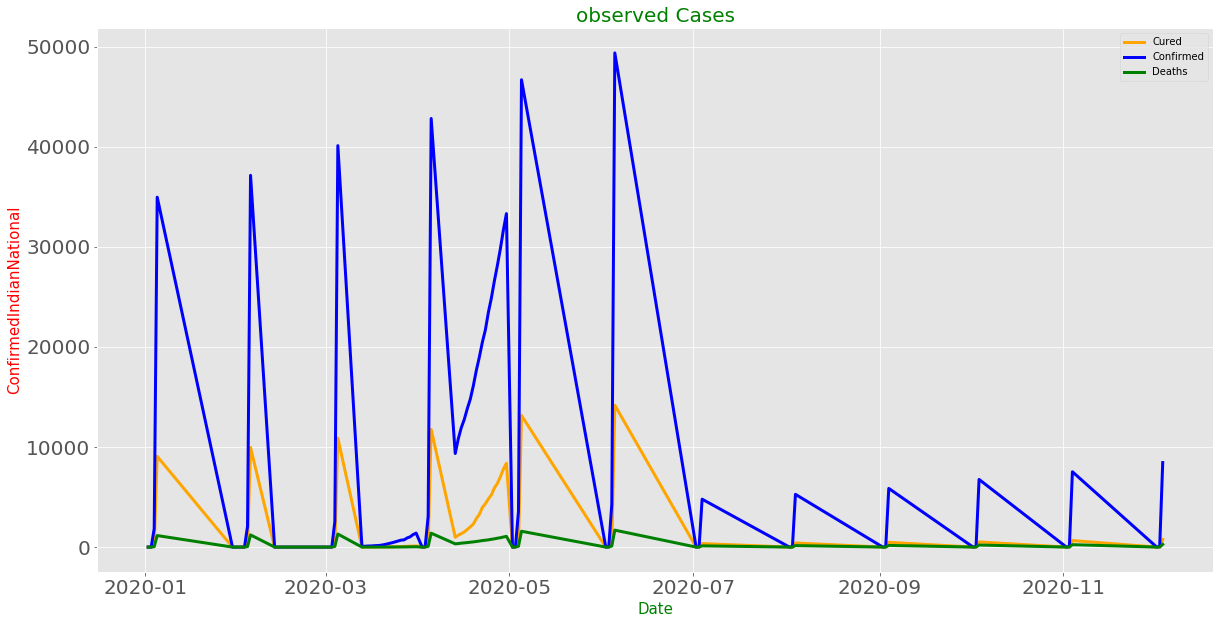

In [276]:
df1=df.groupby("Date")[["Cured","Confirmed","Deaths"]].sum()
plt.figure(figsize=[20,10])
plt.style.use("ggplot")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Date",fontsize=15,color="g")
plt.ylabel("ConfirmedIndianNational",fontsize=15,color="r")
plt.title("observed Cases",fontsize=20,color="g")
plt.plot(df1.index,df1["Cured"],linewidth= 3,label = "Cured",color="orange")
plt.plot(df1.index,df1["Confirmed"],linewidth= 3,label = "Confirmed",color="b")
plt.plot(df1.index,df1["Deaths"],linewidth= 3,label = "Deaths",color="g")
plt.legend(fontsize=10)
plt.show()

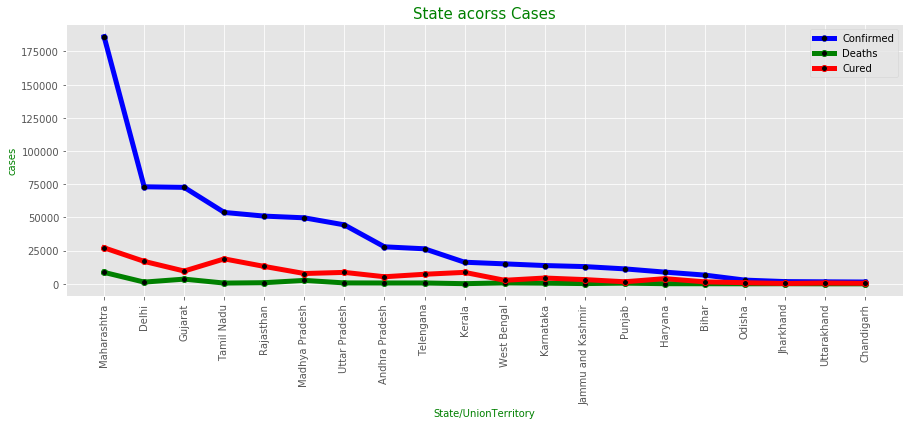

In [277]:
df2 = df.groupby("State/UnionTerritory")[["Cured","Deaths","Confirmed"]].sum()

df2 = df2.nlargest(20,"Confirmed")
plt.figure(figsize=[15,5])
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("State/UnionTerritory",color="g",fontsize=10)
plt.ylabel("cases",color="g",fontsize=10)
plt.title("State acorss Cases",color="g",fontsize=15)
plt.plot(df2.index,df2["Confirmed"],label="Confirmed",marker="o",mfc="black",mew=0.50,linewidth = 5,color="b")
plt.plot(df2.index,df2["Deaths"],label="Deaths",marker ='o',mfc="black",linewidth = 5,color="g")
plt.plot(df2.index,df2["Cured"],label="Cured",marker="o",mfc="black",linewidth = 5,color="r")
plt.legend(fontsize=10)
plt.show()

In [278]:
df["State/UnionTerritory"].nunique()

37

In [279]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["S/U"] = labelencoder.fit_transform(df["State/UnionTerritory"])
df.drop(["State/UnionTerritory"],axis="columns",inplace=True)
df.head()

,Date,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,S/U
Sno,,,,,,,,
1,2020-01-30,6:00 PM,1,0,0,0,1,17
2,2020-01-31,6:00 PM,1,0,0,0,1,17
3,2020-01-02,6:00 PM,2,0,0,0,2,17
4,2020-02-02,6:00 PM,3,0,0,0,3,17
5,2020-03-02,6:00 PM,3,0,0,0,3,17


In [280]:
df["Day"] = df.Date.dt.day
df["Month"] = df.Date.dt.month
df["Year"] = df.Date.dt.year
df.drop(["Date","Time"],axis="columns",inplace=True)
df.head()

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,S/U,Day,Month,Year
Sno,,,,,,,,,
1,1,0,0,0,1,17,30,1,2020
2,1,0,0,0,1,17,31,1,2020
3,2,0,0,0,2,17,2,1,2020
4,3,0,0,0,3,17,2,2,2020
5,3,0,0,0,3,17,2,3,2020


In [281]:
X = df.drop(["Confirmed"],axis="columns")
X.head(500)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,S/U,Day,Month,Year
Sno,,,,,,,,
1,1,0,0,0,17,30,1,2020
2,1,0,0,0,17,31,1,2020
3,2,0,0,0,17,2,1,2020
4,3,0,0,0,17,2,2,2020
5,3,0,0,0,17,2,3,2020
...,...,...,...,...,...,...,...,...
496,0,0,4,1,30,30,3,2020
497,0,0,1,1,31,30,3,2020
498,0,0,2,0,35,30,3,2020


In [282]:
y = df["Confirmed"]
y.head()

Sno
1    1
2    1
3    2
4    3
5    3
Name: Confirmed, dtype: int64

In [283]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [284]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

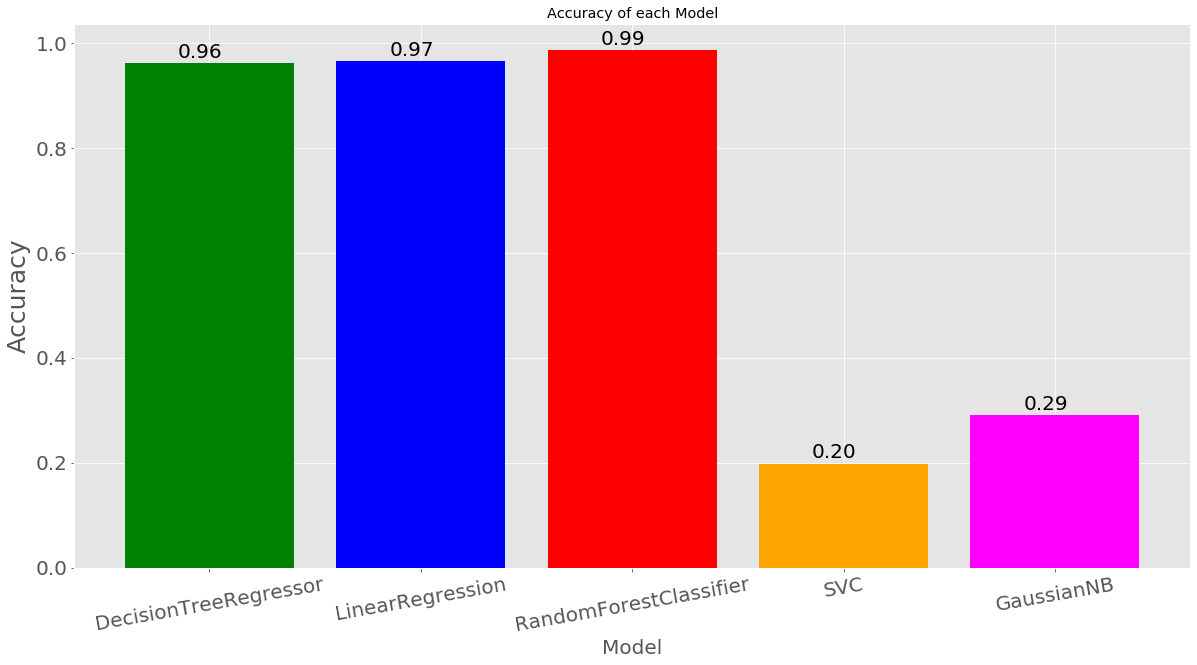

,models,scores
0,DecisionTreeRegressor,0.961634
1,LinearRegression,0.966308
2,RandomForestClassifier,0.986877
3,SVC,0.198689
4,GaussianNB,0.290443


In [313]:
from sklearn.metrics import r2_score
reg = LinearRegression()
tree = DecisionTreeRegressor()
ran = RandomForestClassifier()
nd = SVC()
nb = GaussianNB()


reg.fit(X_train,y_train)
tree.fit(X_train,y_train)
ran.fit(X_train,y_train)
nd.fit(X_train,y_train)
nb.fit(X_train,y_train)

predict1 = tree.predict(X_test)
predict2 = reg.predict(X_test)
predict3 = ran.predict(X_test)
predict4 = nd.predict(X_test)
predict5 = nb.predict(X_test)

score_1= r2_score(y_test,predict1)
score_2= r2_score(y_test,predict2)
score_3 = r2_score(y_test,predict3)
score_4 = r2_score(y_test,predict4)
score_5 = r2_score(y_test,predict5)

scores=[score_1,score_2,score_3,score_4,score_5]
models = ["DecisionTreeRegressor","LinearRegression","RandomForestClassifier","SVC","GaussianNB"]

plt.figure(figsize=[20,10])
plt.xlabel("Model",fontsize=20)
plt.ylabel("Accuracy",fontsize=25)
plt.xticks(fontsize=20,rotation=10)
plt.yticks(fontsize=20)
plt.title("Accuracy of each Model")
plt.bar(models,scores,color=["g","b","r","orange","magenta"],linewidth=2)

for i,v in enumerate(scores):
        
        plt.text(i-.15,v+.01,format(scores[i],'.2f'),fontsize=20)               

plt.show()

data = {"models" : ["DecisionTreeRegressor","LinearRegression","RandomForestClassifier","SVC","GaussianNB"],
    "scores" : [score_1,score_2,score_3,score_4,score_5]}

df = pd.DataFrame(data)
df